# 1.Introduction
I will divide this notebook in parts, in the end of each part i wish improve the results. I will do it until 90+% or spend 2 weeks in this notebook.


Im studying neural networks and than i will use in my works.

## 2 . Simple code only with basics feature engeneering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')
print(trainOriginalData.head(5))
print('\n')
print(testOriginalData.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [4]:
print(trainOriginalData.isna().sum(),"\n")
print(trainOriginalData.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
trainData = trainOriginalData.drop(["Name","Sex","Ticket","Cabin","Embarked","Cabin"], axis = 1)
testData = testOriginalData.drop(["Name", "Sex", "Ticket", "Cabin","Embarked","Cabin"], axis = 1)

In [6]:
yTrain = trainData["Survived"]
xTrain = trainData.fillna(trainData.mode())
xTrain = xTrain.drop(["Survived"],axis = 1)
xTest = testData.fillna(trainData.mode())

In [7]:
print(xTrain.isna().sum(),"\n")
print(xTest.isna().sum())
xTrain['Fare'] = xTrain['Fare'].fillna(xTrain['Fare'].mean())
xTrain['Age'] = xTrain['Age'].fillna(xTrain['Age'].mean())
xTest['Age'] = xTest['Age'].fillna(xTest['Age'].mean())
xTest['Fare'] = xTest['Fare'].fillna(xTest['Fare'].mean())
print(xTest.isna().sum())

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64 

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [8]:
num_epochs = 30
num_hidden_units = 2048
learning_rate_init = 0.01
activation = 'relu'
SEED = 100

In [9]:
mlp = MLPClassifier(
    hidden_layer_sizes=(num_hidden_units,),
    activation=activation,
    learning_rate_init=learning_rate_init,
    warm_start=True,
    verbose=True,
    random_state=SEED,
    early_stopping=True,
    n_iter_no_change=100, # large number of iterations to avoid early stopping message
)

In [10]:
#mlp.fit(xTrain, yTrain)

In [11]:
#predictions = mlp.predict(xTest)
#output = pd.DataFrame({'PassengerId': xTest.PassengerId, 'Survived': predictions})
#output.to_csv('submissionDataCkeanCNN.csv', index=False)
#print("Your submission was successfully saved!")

This part achieve almost 70% in the competetion.

## 2.Adding feature treatment

In [12]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')

In [13]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
trainOriginalData['Sex'] = pd.get_dummies(trainOriginalData['Sex'], dtype=int)["male"]
testOriginalData['Sex'] = pd.get_dummies(testOriginalData['Sex'], dtype=int)["male"]

In [15]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [16]:
trainOriginalData["Age"] = trainOriginalData["Age"]/trainOriginalData["Age"].max()
trainOriginalData['Age'] = trainOriginalData['Age'].fillna(trainOriginalData['Age'].mean())

testOriginalData["Age"] = testOriginalData["Age"]/testOriginalData["Age"].max()
testOriginalData['Age'] = testOriginalData['Age'].fillna(testOriginalData['Age'].mean())

trainOriginalData["Fare"] = trainOriginalData["Fare"]/trainOriginalData["Fare"].max()
trainOriginalData['Fare'] = trainOriginalData['Fare'].fillna(trainOriginalData['Fare'].mean())

testOriginalData["Fare"] = testOriginalData["Fare"]/testOriginalData["Fare"].max()
testOriginalData['Fare'] = testOriginalData['Fare'].fillna(testOriginalData['Fare'].mean())

In [17]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.275000,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.475000,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.325000,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.437500,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0.437500,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.337500,0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.237500,0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.371239,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0.325000,0,0,111369,0.058556,C148,C


In [18]:
trainOriginalData = trainOriginalData.drop(["Ticket","Cabin","Name","PassengerId"], axis = 1)
testOriginalData = testOriginalData.drop(["Ticket","Cabin","Name","PassengerId"], axis = 1)

In [19]:
trainOriginalData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.275000,1,0,0.014151,S
1,1,1,0,0.475000,1,0,0.139136,C
2,1,3,0,0.325000,0,0,0.015469,S
3,1,1,0,0.437500,1,0,0.103644,S
4,0,3,1,0.437500,0,0,0.015713,S
...,...,...,...,...,...,...,...,...
886,0,2,1,0.337500,0,0,0.025374,S
887,1,1,0,0.237500,0,0,0.058556,S
888,0,3,0,0.371239,1,2,0.045771,S
889,1,1,1,0.325000,0,0,0.058556,C


In [20]:
pd.get_dummies(trainOriginalData['Embarked'], dtype=int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [21]:
trainOriginalData = pd.concat([trainOriginalData, pd.get_dummies(trainOriginalData['Embarked'], dtype=int)], axis=1)
testOriginalData = pd.concat([testOriginalData, pd.get_dummies(testOriginalData['Embarked'], dtype=int)], axis=1)

In [22]:
trainOriginalData = trainOriginalData.drop(["Embarked"], axis = 1)
testOriginalData = testOriginalData.drop(["Embarked"], axis = 1)

In [23]:
trainData = trainOriginalData
testData = testOriginalData

In [24]:
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,0.453947,0,0,0.015282,0,1,0
1,3,0,0.618421,1,0,0.013663,0,0,1
2,2,1,0.815789,0,0,0.018909,0,1,0
3,3,1,0.355263,0,0,0.016908,0,0,1
4,3,0,0.289474,1,1,0.023984,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,0.398324,0,0,0.015713,0,0,1
414,1,0,0.513158,0,0,0.212559,1,0,0
415,3,1,0.506579,0,0,0.014151,0,0,1
416,3,1,0.398324,0,0,0.015713,0,0,1


In [25]:
mlp = MLPClassifier(
    hidden_layer_sizes=(num_hidden_units,),
    activation=activation,
    learning_rate_init=learning_rate_init,
    warm_start=False,
    max_iter= 9999,
    batch_size=50,
    verbose=False,
    validation_fraction = 0.2,
    learning_rate = "adaptive",
    random_state=SEED,
    early_stopping=True,
    n_iter_no_change=100, # large number of iterations to avoid early stopping message
)

In [26]:
#mlp.fit(xTrain, yTrain)
#scores = cross_val_score(mlp, xTrain, yTrain, cv=5)
#print("Mean Accuracy was: ",sum(scores)/len(scores))

In [27]:
'''mlp.fit(xTrain, yTrain)
predictions = mlp.predict(xTest)
output = pd.DataFrame({'PassengerId': xTest.PassengerId, 'Survived': predictions})
output.to_csv('submissionDataCleanedCNN.csv', index=False)
print("Your submission was successfully saved!")'''

'mlp.fit(xTrain, yTrain)\npredictions = mlp.predict(xTest)\noutput = pd.DataFrame({\'PassengerId\': xTest.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'submissionDataCleanedCNN.csv\', index=False)\nprint("Your submission was successfully saved!")'

The result was worst than last one, now i will make a better feature engeneering

## 3.Treating data outliers and improving feature engeneering


https://numpy.org/doc/2.1/reference/generated/numpy.percentile.html

In [28]:
def multiOutliersDataset(df: pd.DataFrame, qtOut: int, features: list) -> list:
    indices = []
    # Iterar pelas colunas especificadas
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        outlierLimits = 1.5 * IQR

        outliersColumn = df[(df[col] < Q1 - outlierLimits) | (df[col] > Q3 + outlierLimits)].index
        indices.extend(outliersColumn)

    # Contar ocorrências de outliers por observação
    outlier_counts = Counter(indices)

    # Selecionar observações com mais de 'n' outliers
    multiple_outliers = [index for index, count in outlier_counts.items() if count > qtOut]

    return multiple_outliers

In [29]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')

passangerId = testOriginalData['PassengerId'].copy()

print(passangerId)

print("Data type of dataframe columns: \n",trainOriginalData.dtypes)
print("\nStatistical metrics on data: \n", trainOriginalData.describe())

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64
Data type of dataframe columns: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Statistical metrics on data: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28

In [30]:
print("Train Original Data\n",trainOriginalData.fillna(np.nan).isnull().sum())
print("\nTest Original Data\n",testOriginalData.fillna(np.nan).isnull().sum())

Train Original Data
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Original Data
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [31]:
trainOriginalData['Sex'] = pd.get_dummies(trainOriginalData['Sex'], dtype=int)["male"]
testOriginalData['Sex'] = pd.get_dummies(testOriginalData['Sex'], dtype=int)["male"]

In [32]:
trainOriginalData = trainOriginalData.drop((multiOutliersDataset(trainOriginalData,2,["Pclass","Sex","Age","SibSp","Parch","Fare"])), axis = 0).reset_index(drop=True)

### 3.1. Feature Analisis

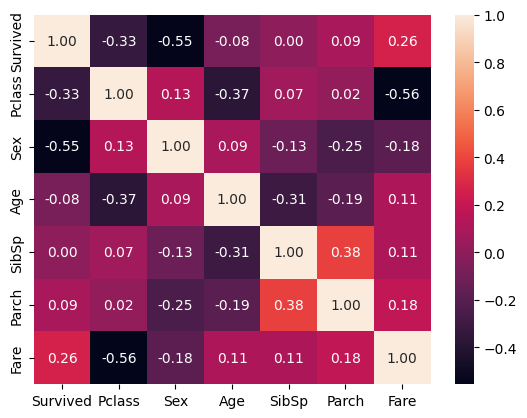

In [33]:
g = sns.heatmap(trainOriginalData[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]].corr(),annot=True, fmt = ".2f")

In [34]:
trainOriginalData = pd.concat([trainOriginalData, pd.get_dummies(trainOriginalData['Embarked'], dtype=int)], axis=1)
testOriginalData = pd.concat([testOriginalData, pd.get_dummies(testOriginalData['Embarked'], dtype=int)], axis=1)
trainOriginalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


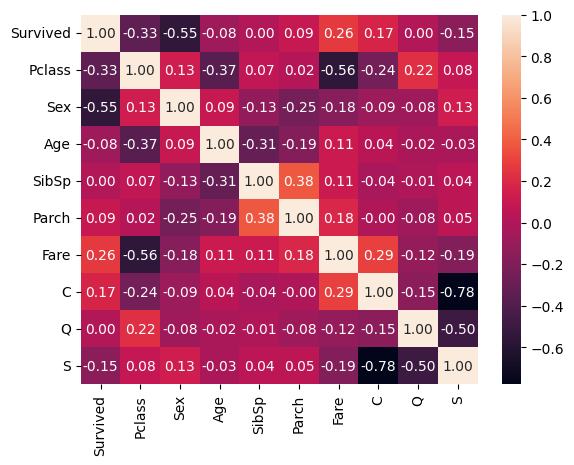

In [35]:
#I will study the data in the same order: "Pclass","Sex","Age","SibSp","Parch","Fare",["C","Q","S"], separing in categorical and numerical
# Categorical 
g = sns.heatmap(trainOriginalData[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","C","Q","S"]].corr(),annot=True, fmt = ".2f")

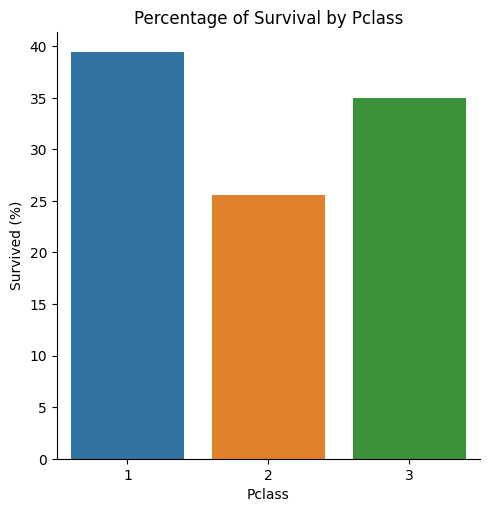

In [36]:
#Pclass = Ticker Class = 1 = 1st; 2 = 2nd; 3 = 3rd

pclass_survived = trainOriginalData.groupby('Pclass')['Survived'].sum()

pclass_survived_percentage = (pclass_survived / pclass_survived.sum()) * 100

pclass_survived_percentage = pclass_survived_percentage.reset_index()
pclass_survived_percentage.columns = ['Pclass', 'Survived_Percentage']

sns.catplot(
    x="Pclass", 
    y="Survived_Percentage", 
    data=pclass_survived_percentage, 
    kind="bar"
)
plt.ylabel('Survived (%)')  # Update the y-axis label
plt.title('Percentage of Survival by Pclass')  # Add a title
plt.show()

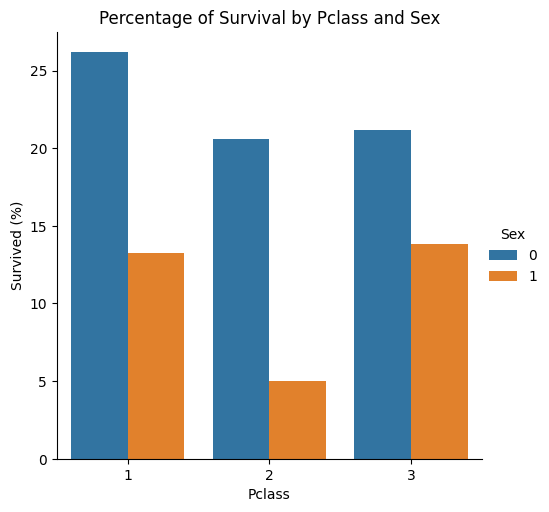

In [37]:
# Group by 'Pclass' and 'Sex', and calculate the sum of 'Survived' for each group
pclassSexSurvived = trainOriginalData.groupby(['Pclass', 'Sex'])['Survived'].sum()

pclassSexSurvivedPercentage = (
    pclassSexSurvived / pclassSexSurvived.sum()
) * 100

pclassSexSurvivedPercentage = pclassSexSurvivedPercentage.reset_index()
pclassSexSurvivedPercentage.columns = ['Pclass', 'Sex', 'Survived_Percentage']


sns.catplot(
    x="Pclass", 
    y="Survived_Percentage", 
    hue="Sex",  # Separate bars by Sex
    data=pclassSexSurvivedPercentage, 
    kind="bar"
)
plt.ylabel('Survived (%)')  # Update the y-axis label
plt.title('Percentage of Survival by Pclass and Sex')  # Add a title
plt.show()

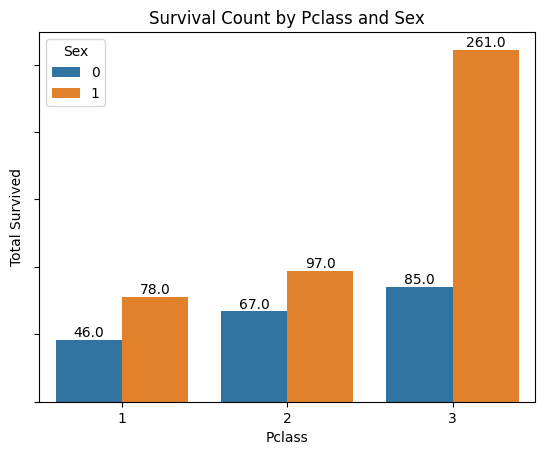

In [38]:
ax = sns.barplot(
    data=trainOriginalData, 
    x="Pclass", 
    y="S", 
    hue="Sex", 
    estimator="sum", 
    ci=None  # Remove o intervalo de confiança
)

# Adiciona os valores no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  # Formata os valores com uma casa decimal

# Ajusta os rótulos e título
ax.set(yticklabels=[]) 
plt.ylabel("Total Survived")
plt.title("Survival Count by Pclass and Sex")
plt.show()


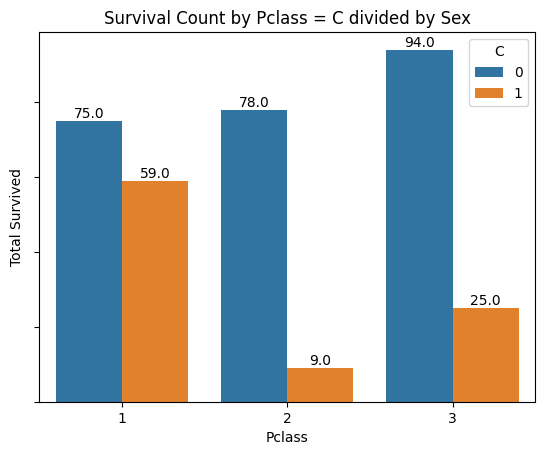

In [39]:
# Cria o gráfico de barras sem o intervalo de confiança
ax = sns.barplot(
    data=trainOriginalData, 
    x="Pclass", 
    y="Survived", 
    hue="C", 
    estimator="sum", 
    ci=None  # Remove o intervalo de confiança
)

# Adiciona os valores no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  # Formata os valores com uma casa decimal

# Ajusta os rótulos e título
ax.set(yticklabels=[]) 
plt.ylabel("Total Survived")
plt.title("Survival Count by Pclass = C divided by Sex")
plt.show()


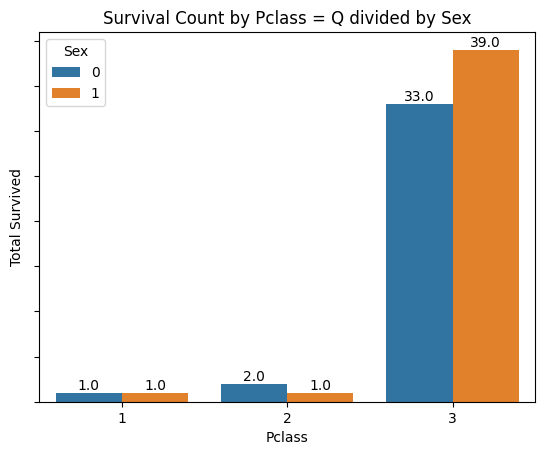

In [40]:
# Cria o gráfico de barras sem o intervalo de confiança
ax = sns.barplot(
    data=trainOriginalData, 
    x="Pclass", 
    y="Q", 
    hue="Sex", 
    estimator="sum", 
    ci=None  # Remove o intervalo de confiança
)

# Adiciona os valores no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  # Formata os valores com uma casa decimal

# Ajusta os rótulos e título
ax.set(yticklabels=[]) 
plt.ylabel("Total Survived")
plt.title("Survival Count by Pclass = Q divided by Sex")
plt.show()


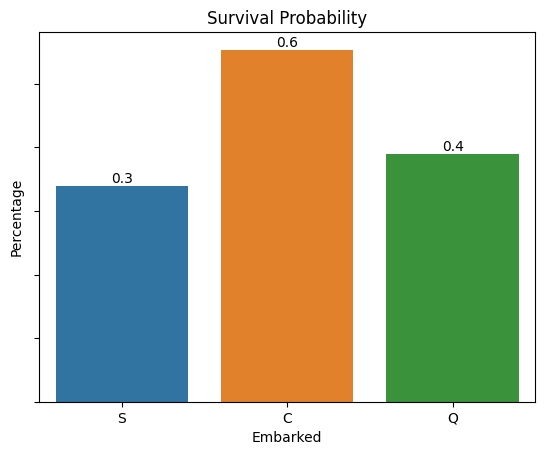

In [41]:
# Cria o gráfico de barras sem o intervalo de confiança
ax = sns.barplot(
    data=trainOriginalData, 
    x="Embarked", 
    y="Survived",
    ci=None  # Remove o intervalo de confiança
)

# Adiciona os valores no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  # Formata os valores com uma casa decimal

# Ajusta os rótulos e título
ax.set(yticklabels=[]) 
plt.title("Survival Probability")
plt.ylabel("Percentage")
plt.show()


In [42]:
trainOriginalData = trainOriginalData.drop(["Embarked"], axis = 1 )
testOriginalData = testOriginalData.drop(["Embarked"], axis = 1)

In [43]:
trainOriginalData['Title'] = trainOriginalData['Name'].str.extract(r',\s*(\w+)\.')
testOriginalData['Title'] = testOriginalData['Name'].str.extract(r',\s*(\w+)\.')

In [44]:
print(trainOriginalData['Title'].value_counts())
trainOriginalData.head()

Title
Mr          513
Miss        177
Mrs         125
Master       39
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,Mr


In [45]:
trainOriginalData = pd.concat([trainOriginalData, pd.get_dummies(trainOriginalData['Title'], dtype=int)], axis=1)
testOriginalData = pd.concat([testOriginalData, pd.get_dummies(testOriginalData['Title'], dtype=int)], axis=1)
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,0
877,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,0,0,0,0,0
879,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,0,0,0,1,0,0,0,0


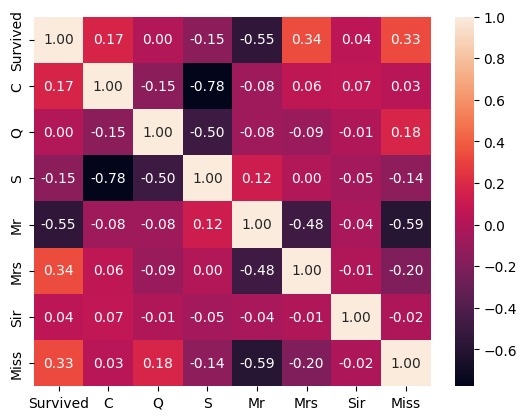

In [46]:
#I will study the data in the same order: "Pclass","Sex","Age","SibSp","Parch","Fare",["C","Q","S"], separing in categorical and numerical
# Categorical 
g = sns.heatmap(trainOriginalData[["Survived","C","Q","S","Mr","Mrs","Sir","Miss"]].corr(),annot=True, fmt = ".2f")

In [47]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,0
877,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,0,0,0,0,0
879,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,0,0,0,1,0,0,0,0


In [48]:
print("Data type of dataframe columns: \n",trainOriginalData.dtypes)

Data type of dataframe columns: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
C                int64
Q                int64
S                int64
Title           object
Capt             int64
Col              int64
Don              int64
Dr               int64
Jonkheer         int64
Lady             int64
Major            int64
Master           int64
Miss             int64
Mlle             int64
Mme              int64
Mr               int64
Mrs              int64
Ms               int64
Rev              int64
Sir              int64
dtype: object


In [49]:
trainOriginalData["Age"] = trainOriginalData["Age"]/trainOriginalData["Age"].max()
trainOriginalData['Age'] = trainOriginalData['Age'].fillna(trainOriginalData['Age'].mean())

testOriginalData["Age"] = testOriginalData["Age"]/testOriginalData["Age"].max()
testOriginalData['Age'] = testOriginalData['Age'].fillna(testOriginalData['Age'].mean())

trainOriginalData['Fare'] = trainOriginalData['Fare'].fillna(0)
trainOriginalData["Fare"] = trainOriginalData["Fare"]/trainOriginalData["Fare"].max()

testOriginalData['Fare'] = testOriginalData['Fare'].fillna(0)
testOriginalData["Fare"] = testOriginalData["Fare"]/testOriginalData["Fare"].max()


In [50]:
trainOriginalData = trainOriginalData.drop(["Ticket","Title","Cabin","Name","PassengerId"], axis = 1)
testOriginalData = testOriginalData.drop(["Ticket","Title","Cabin","Name","PassengerId"], axis = 1)

In [51]:
print("Data type of dataframe columns: \n",trainOriginalData.dtypes)
print("Data type of dataframe columns: \n",testOriginalData.dtypes)
columns_only_in_df1 = set(trainOriginalData.columns) - set(testOriginalData.columns)
print("Coluns only presents in DF1: ", columns_only_in_df1)

Data type of dataframe columns: 
 Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C             int64
Q             int64
S             int64
Capt          int64
Col           int64
Don           int64
Dr            int64
Jonkheer      int64
Lady          int64
Major         int64
Master        int64
Miss          int64
Mlle          int64
Mme           int64
Mr            int64
Mrs           int64
Ms            int64
Rev           int64
Sir           int64
dtype: object
Data type of dataframe columns: 
 Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
C           int64
Q           int64
S           int64
Col         int64
Dona        int64
Dr          int64
Master      int64
Miss        int64
Mr          int64
Mrs         int64
Ms          int64
Rev         int64
dtype: object
Coluns only presents in DF1:  {'Lady', 'Major', 'Don', 'Capt

In [52]:
# Supondo que o DataFrame existente seja df
missing_columns = {'Mlle', 'Lady', 'Don', 'Jonkheer', 'Sir', 'Mme', 'Major', 'Capt', 'Don'}

# Adicionar as colunas ausentes com valor 0
for col in missing_columns:
    if col not in testOriginalData.columns:
        testOriginalData[col] = 0

# Exibir o DataFrame atualizado

# Supondo que o DataFrame existente seja df
missing_columns = {'Dona', 'Survived'}

# Adicionar as colunas ausentes com valor 0
for col in missing_columns:
    if col not in trainOriginalData.columns:
        trainOriginalData[col] = 0

# Exibir o DataFrame atualizado



In [53]:
num_epochs = 300
num_hidden_units = 512
learning_rate_init = 0.01
activation = 'relu'
SEED = 100

mlp = MLPClassifier(
    hidden_layer_sizes=(num_hidden_units,),
    activation=activation,
    learning_rate_init=learning_rate_init,
    warm_start=False,
    max_iter= 9999,
    batch_size=50,
    verbose=False,
    validation_fraction = 0.2,
    learning_rate = "adaptive",
    random_state=SEED,
    early_stopping=True,
    n_iter_no_change=200, # large number of iterations to avoid early stopping message
)


In [54]:
yTrain = trainOriginalData["Survived"]
xTrain = trainOriginalData.fillna(0)
xTrain = trainOriginalData.drop(["Survived"],axis = 1)
xTest = testOriginalData.fillna(0)

In [55]:
columns_only_in_df1 = set(xTrain.columns) - set(xTest.columns)
print("Coluns only presents in DF1: ", columns_only_in_df1)

columns_only_in_df2 = set(xTest.columns) - set(xTrain.columns)
print("Coluns only presents in DF1: ", columns_only_in_df2)

Coluns only presents in DF1:  set()
Coluns only presents in DF1:  set()


In [56]:
#mlp.fit(xTrain, yTrain)
#scores = cross_val_score(mlp, xTrain, yTrain, cv=5)
#print("Mean Accuracy was: ",sum(scores)/len(scores))

### Mean Accuracy with 512 layers was:  0.8127118644067796
### Mean Accuracy with 1024 layers was:  0.8059001027221366



In [57]:
mlp.fit(xTrain, yTrain)

MLPClassifier(batch_size=50, early_stopping=True, hidden_layer_sizes=(512,),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=9999,
              n_iter_no_change=200, random_state=100, validation_fraction=0.2)

In [58]:
print(xTrain.columns)
print(xTest.columns)

# Reorganizar as colunas
xTest = xTest.reindex(columns=xTrain.columns)

# Exibir o DataFrame reorganizado
print(xTest.columns)


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Capt',
       'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss',
       'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'Dona'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Col',
       'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev', 'Lady',
       'Major', 'Don', 'Capt', 'Mme', 'Jonkheer', 'Sir', 'Mlle'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Capt',
       'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss',
       'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'Dona'],
      dtype='object')


In [59]:
'''model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100, min_samples_leaf= 3)
mlp.fit(xTrain, yTrain)
scores = cross_val_score(model, xTrain, yTrain, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))

model.fit(xTrain, yTrain)
predictions = model.predict(xTest)

output = pd.DataFrame({'PassengerId': passangerId, 'Survived': predictions})
output.to_csv('submissionRF.csv', index=False)
print("Your submission was successfully saved!")
'''

'model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100, min_samples_leaf= 3)\nmlp.fit(xTrain, yTrain)\nscores = cross_val_score(model, xTrain, yTrain, cv=5)\nprint("Mean Accuracy was: ",sum(scores)/len(scores))\n\nmodel.fit(xTrain, yTrain)\npredictions = model.predict(xTest)\n\noutput = pd.DataFrame({\'PassengerId\': passangerId, \'Survived\': predictions})\noutput.to_csv(\'submissionRF.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

## List of thing to do
### Use another metrics to fill the nan values
### Make a better data balance

Results with test data

No technique to grow or reduce data

Neural network Mean Accuracy was:  0.8127118644067796


Using UnderSampler less data

Neural network = Mean Accuracy was:  0.7735294117647059

Random forest = Mean Accuracy was:  0.788235294117647
Using OverSampler More data

Neural network Mean Accuracy was:  0.7985535074244752

Random Forest Mean Accuracy was:  0.8299752517494452




In [60]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X_resampled, y_resampled = rus.fit_resample(xTrain, yTrain)
X_resampled

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,Dona
377,3,1,0.371645,0,0,0.015412,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
116,1,1,0.300000,0,1,0.483128,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
583,3,1,0.437500,0,0,0.013907,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
135,1,1,0.462500,1,0,0.103644,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
768,3,1,0.225000,0,0,0.015127,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,3,0,0.187500,0,0,0.014102,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
869,1,0,0.700000,0,1,0.162314,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
870,2,0,0.312500,0,1,0.050749,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
877,1,0,0.237500,0,0,0.058556,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
#mlp.fit(xTrain, yTrain)
scores = cross_val_score(mlp, X_resampled, y_resampled, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))
mlp.fit(X_resampled, y_resampled)

# Reorganizar as colunas
xTest = xTest.reindex(columns=xTrain.columns)
predictions = mlp.predict(xTest)

output = pd.DataFrame({'PassengerId': passangerId, 'Survived': predictions})
output.to_csv('submissionNeuralNetworkUnderSamp.csv', index=False)
print("Your submission was successfully saved!")

Mean Accuracy was:  0.7735294117647059
Your submission was successfully saved!


In [62]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100, min_samples_leaf= 3)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))

model.fit(X_resampled, y_resampled)
predictions = model.predict(xTest)

output = pd.DataFrame({'PassengerId': passangerId, 'Survived': predictions})
output.to_csv('submissionRFUnderSamp.csv', index=False)
print("Your submission was successfully saved!")

Mean Accuracy was:  0.788235294117647
Your submission was successfully saved!


In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(xTrain, yTrain)
X_resampled

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Capt,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,Dona
0,3,1,0.275000,1,0,0.014151,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.475000,1,0,0.139136,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,0,0.325000,0,0,0.015469,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0.437500,1,0,0.103644,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,1,0.437500,0,0,0.015713,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,2,1,0.028257,1,1,0.033965,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1078,1,0,0.328174,0,1,0.113057,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1079,3,1,0.337500,0,0,0.015830,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1080,3,0,0.391673,1,0,0.032074,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
#mlp.fit(xTrain, yTrain)
scores = cross_val_score(mlp, X_resampled, y_resampled, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))
mlp.fit(X_resampled, y_resampled)

# Reorganizar as colunas
xTest = xTest.reindex(columns=xTrain.columns)
predictions = mlp.predict(xTest)

output = pd.DataFrame({'PassengerId': passangerId, 'Survived': predictions})
output.to_csv('submissionNeuralNetworkOverSamp.csv', index=False)
print("Your submission was successfully saved!")

Mean Accuracy was:  0.8003925584570746
Your submission was successfully saved!


In [65]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100, min_samples_leaf= 3)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))

model.fit(X_resampled, y_resampled)
predictions = model.predict(xTest)

output = pd.DataFrame({'PassengerId': passangerId, 'Survived': predictions})
output.to_csv('submissionRFOverSamp.csv', index=False)
print("Your submission was successfully saved!")

Mean Accuracy was:  0.819794333504011
Your submission was successfully saved!
